In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The expression of the logistic regression may be rewritten as:
$$p(x)=\frac{1}{1+e^{-(\beta_0+\beta_1 x)}}$$

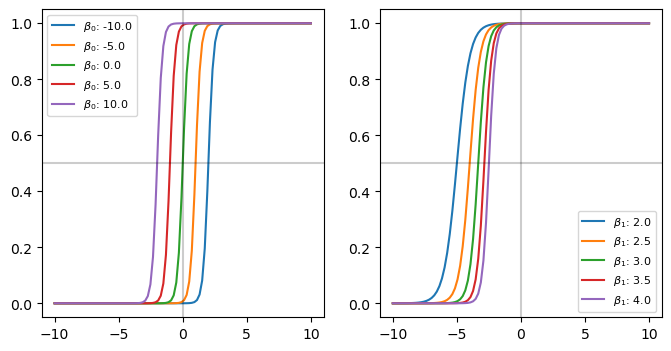

In [92]:
x = np.linspace(-10,10,100)
beta_0 = 10
beta_1 = 5
betas_0 = np.linspace(-10,10,5)
betas_1 = np.linspace(2,4,5)

Log_reg = lambda x, beta_0, beta_1 : 1/(1+np.exp(-(beta_0+beta_1*x)))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
for beta_0 in betas_0:
    ax1.plot(x, Log_reg(x, beta_0, beta_1), label=f'$\\beta_0$: {beta_0:.1f}')
for beta_1 in betas_1:
    ax2.plot(x, Log_reg(x, beta_0, beta_1), label=f'$\\beta_1$: {beta_1:.1f}')
ax1.axhline(0.5,color = 'k',alpha=0.2)
ax1.axvline(0,color = 'k',alpha=0.2)
ax2.axhline(0.5,color = 'k',alpha=0.2)
ax2.axvline(0,color = 'k',alpha=0.2)
ax1.legend(fontsize=8)
ax2.legend(fontsize=8)
plt.show()

In [93]:
diabetes_data = pd.read_csv('../data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(diabetes_data['Glucose'], diabetes_data['Outcome'], test_size=0.3)
log_Regr_model = LogisticRegression(max_iter=1000)
log_Regr_model.fit(np.array(X_train).reshape(-1, 1), np.array(y_train))

y_pred = log_Regr_model.predict(np.array(X_test).reshape(-1, 1))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")


Accuracy: 77.49%


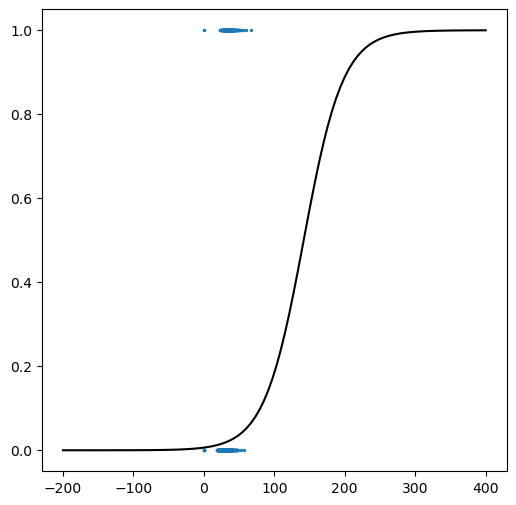

In [95]:
x = np.linspace(-200,400,100)
f, ax = plt.subplots(figsize=(6,6))
ax.scatter(diabetes_data['BMI'], diabetes_data['Outcome'],s=2)
ax.plot(x,Log_reg(x, log_Regr_model.intercept_[0], log_Regr_model.coef_[0][0]),color='black')
plt.show()

231


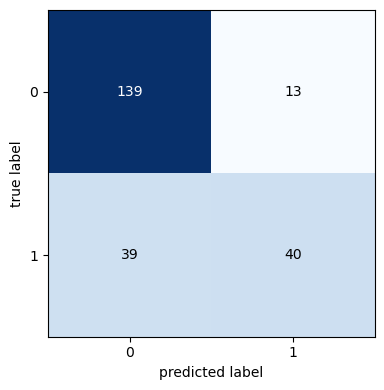

In [98]:
print(len(y_test))

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
ypred = log_Regr_model.predict(np.array(X_test).reshape(-1, 1))
matriz = confusion_matrix(y_test,ypred)
plot_confusion_matrix(conf_mat=matriz, figsize=(4,4), show_normed=False)
plt.tight_layout()
